In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [26]:
iris_df = pd.read_csv('Iris.csv')
    # Assuming the dataset has columns 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
iris_data = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values #species column is segregated from the dataset
res=iris_df['Species']
#print(iris_data)

In [7]:
def initialize_centroids(data, k):       #Intialsie the centroids 
    np.random.seed(42)
    centroids_indices = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[centroids_indices]
    return centroids

In [8]:
def assign_clusters(data, centroids):              #finding cluters with the given centroids
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=-1)
    clusters = np.argmin(distances, axis=1)
    return clusters

In [9]:
def update_centroids(data, clusters, k):         #update the centroids each time
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_data = data[clusters == i]
        if len(cluster_data) > 0:
            centroids[i] = np.mean(cluster_data, axis=0)
    return centroids

**Defining KMeans function with Dataset as an argument**

In [27]:
def kmeans(data, k, max_iterations=100):
    # Step 1: Initialize centroids
    centroids = initialize_centroids(data, k)

    for _ in range(max_iterations):
        # Step 2: Assign data points to clusters based on the current centroids
        clusters = assign_clusters(data, centroids)

        # Step 3: Update centroids based on the assigned clusters
        centroids = update_centroids(data, clusters, k)

        # Step 4: Check if the centroids have converged (no change from the previous iteration)
        # If the centroids have converged, exit the loop
        prev_centroids = centroids.copy()
        if np.all(prev_centroids == centroids):
            break

    # Return the final clusters and centroids
    return clusters, centroids


In [11]:
k = 3  # Number of clusters
clusters, centroids = kmeans(iris_data, k)
print("Cluster assignments:", clusters)
print("Centroids:", centroids)

Cluster assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Centroids: [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


 **Graph showing output of the cluster**

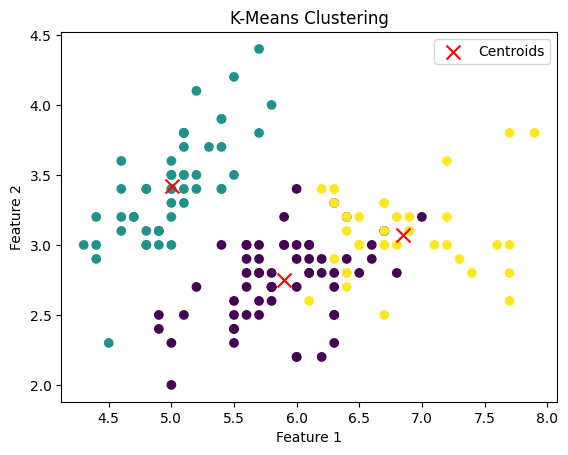

In [20]:
import matplotlib.pyplot as plt

def plot_clusters(data, clusters, centroids):
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=100, label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

# Assuming data has 2 features (change as per your data)
data = iris_data[:,:]

# Perform K-Means clustering
k = 3  # Number of clusters
clusters, centroids = kmeans(data, k)

# Plot the clusters
plot_clusters(data, clusters, centroids)


 **Graph showing actual species**

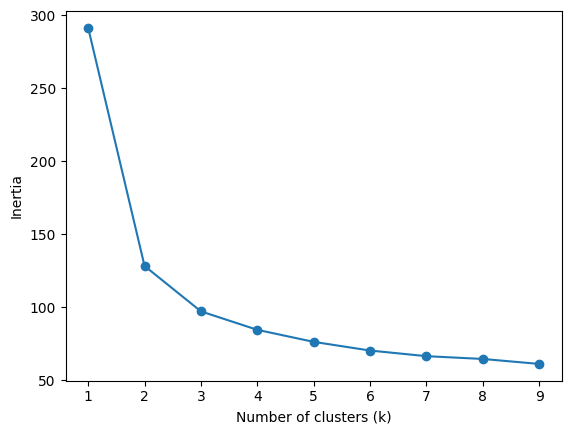

In [25]:
def calculate_inertia(data, k_range):
    inertia = []
    for k in k_range:
        _, centroids = kmeans(data, k)
        clusters = assign_clusters(data, centroids)
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=-1)
        inertia.append(np.sum(np.min(distances, axis=1)))
    return inertia

k_range = range(1, 10)
inertia = calculate_inertia(iris_data, k_range)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()
